# Exploring, enriching and making the data visual

## 1. Exploring and enriching

In [118]:
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup
import re
import src.cleaning_utils as cu
import seaborn as sns
import src.cleaning_utils as cu
import matplotlib.pyplot as plt
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster

In [119]:
#Select our url
url = "https://en.wikipedia.org/wiki/Tourism_in_Portugal"

In [120]:
#Obtein the data
html = requests.get(url)

In [121]:
soup = BeautifulSoup(html.content, "html.parser")

In [122]:
# We want to take the information of a table so we see how many tables are in our site and which one we want to take
tablas = soup.find_all("table")

In [123]:
# We see how many tables do we have
len(tablas)

11

In [124]:
# We look for the first table where are the datas we need
tourists = tablas[0]

In [125]:
# We explore de data to see where we need to go
tourist = tourists.find_all("a")[2]
tourist

<a href="/wiki/France" title="France">France</a>

In [126]:
# See the data text
tourist.text

'France'

In [127]:
# We call the table
tourists = soup.find_all("table")[0]

In [128]:
#See the data
tourists.find_all("tr")[1]

<tr>
<td>1</td>
<td><span class="datasortkey" data-sort-value="United Kingdom"><span class="flagicon"><img alt="" class="thumbborder" data-file-height="600" data-file-width="1200" decoding="async" height="12" src="//upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/23px-Flag_of_the_United_Kingdom.svg.png" srcset="//upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/35px-Flag_of_the_United_Kingdom.svg.png 1.5x, //upload.wikimedia.org/wikipedia/en/thumb/a/ae/Flag_of_the_United_Kingdom.svg/46px-Flag_of_the_United_Kingdom.svg.png 2x" width="23"/> </span><a href="/wiki/United_Kingdom" title="United Kingdom">United Kingdom</a></span></td>
<td>2,099,008</td>
<td>2,042,867</td>
<td>2,145,902
</td></tr>

In [129]:
tourists.find_all("tr")[1].find_all("td")[3].text.strip()

'2,042,867'

In [130]:
# Iterate this data. in order to get all values
tourist_barr = []
for f in tourists.find_all("tr"): 
    fila = [e for e in f.find_all("td")]
    if len(fila) > 0:
        pais = { "Pais" : fila[1].text.strip(),
                "Number_tourists_2017": fila[3].text
              
        }
        
        tourist_barr.append(pais)

In [131]:
# Get de data table
data_tourists = pd.DataFrame(tourist_barr)
data_tourists

,Pais,Number_tourists_2017
0,United Kingdom,"2,042,867"
1,Spain,"2,069,645"
2,France,"1,641,912"
3,Germany,"1,602,066"
4,Brazil,"1,103,718"
5,United States,"981,822"
6,Italy,"665,930"
7,Netherlands,"610,161"
8,Ireland,"357,542"
9,China,"324,258"


## 2. Making it visual

In [132]:
# e take the data set we cleaned and save
data_model = pd.read_csv("./output/data_modelo.csv")
data_model

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [133]:
# look for unique to understand our dataset
data_model["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [134]:
# We make our hotel variable more understanable. If City = Lisbon and ir Resort = Algarve
data_model["hotel"] = data_model["hotel"].apply(cu.cleaning)
data_model.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Algarve,0,342,2015,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Algarve,0,737,2015,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Algarve,0,7,2015,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Algarve,0,13,2015,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Algarve,0,14,2015,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [135]:
# We just keep years fron 2015
data_model["arrival_date_year"] = data_model[data_model["arrival_date_year"]>2015]["arrival_date_year"]
data_model.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Algarve,0,342,NaN,July,27,1,0,0,2,...,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Algarve,0,737,NaN,July,27,1,0,0,2,...,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Algarve,0,7,NaN,July,27,1,0,1,1,...,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Algarve,0,13,NaN,July,27,1,0,1,1,...,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Algarve,0,14,NaN,July,27,1,0,2,2,...,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [136]:
data_model = data_model[data_model["arrival_date_year"].notnull()]
data_model.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3738,Algarve,0,109,2016.0,January,1,1,0,1,2,...,D,0,No Deposit,0,Transient-Party,59.94,0,1,Check-Out,2016-01-02
3739,Algarve,0,109,2016.0,January,1,1,0,1,2,...,H,0,No Deposit,0,Transient-Party,116.10,1,1,Check-Out,2016-01-02
3740,Algarve,1,2,2016.0,January,1,1,0,1,2,...,D,0,No Deposit,0,Transient,89.00,0,1,No-Show,2016-01-01
3741,Algarve,0,88,2016.0,January,1,1,0,2,2,...,D,0,No Deposit,0,Transient,73.46,0,2,Check-Out,2016-01-03
3742,Algarve,1,20,2016.0,January,1,1,0,2,2,...,G,0,No Deposit,0,Transient,119.00,0,0,Canceled,2015-12-22


In [137]:
data_model["arrival_date_year"].unique()

array([2016., 2017.])

Text(0.5, 0, 'Zone')

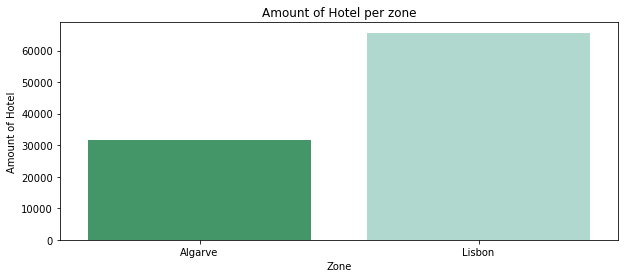

In [138]:
# Plot count values to see if people visit more lisbon or Algarve
plt.figure(figsize=(10,4))
Hotel_plot = sns.countplot(x=data_model.hotel, palette= "BuGn_r")
Hotel_plot.set_title("Amount of Hotel per zone")
Hotel_plot.set_ylabel("Amount of Hotel")
Hotel_plot.set_xlabel("Zone")

Text(0.5, 0, 'Zone')

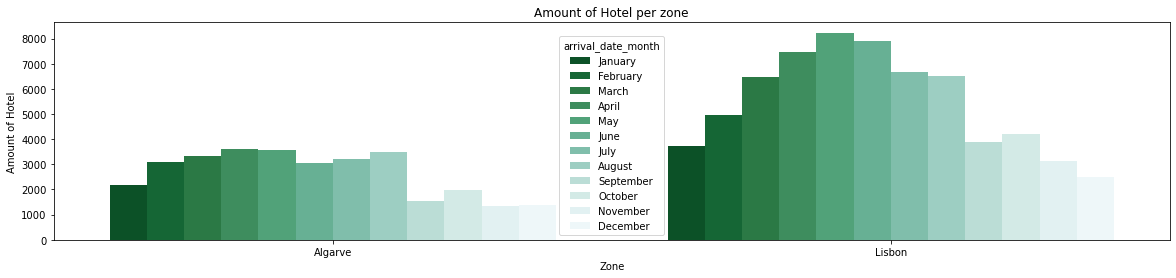

In [139]:
# Are there differences between zones and when people visit?

plt.figure(figsize=(20,4))
Hotel_plot = sns.countplot(x=data_model.hotel, hue = data_model.arrival_date_month, palette= "BuGn_r")
Hotel_plot.set_title("Amount of Hotel per zone")
Hotel_plot.set_ylabel("Amount of Hotel")
Hotel_plot.set_xlabel("Zone")

We can see that although it seemed that the Algarve would be more seasonal, the visits in this area are more stable throughout the months.

In [140]:
# We take only datas fro lisbon
data_lisbon = data_model[data_model["hotel"]== "Lisbon"]
data_lisbon

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
46421,Lisbon,1,119,2016.0,January,1,1,0,1,2,...,A,1,No Deposit,0,Transient,74.25,0,0,Canceled,2015-12-31
46422,Lisbon,0,0,2016.0,January,1,1,0,1,2,...,A,0,No Deposit,0,Transient,105.00,0,0,Check-Out,2016-01-02
46423,Lisbon,0,0,2016.0,January,1,1,0,1,2,...,A,0,No Deposit,0,Transient,86.00,0,0,Check-Out,2016-01-02
46424,Lisbon,0,19,2016.0,January,1,1,0,2,1,...,A,0,No Deposit,0,Transient,107.00,0,1,Check-Out,2016-01-03
46425,Lisbon,0,30,2016.0,January,1,1,0,2,2,...,A,0,No Deposit,0,Transient,92.00,0,1,Check-Out,2016-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,Lisbon,0,23,2017.0,August,35,30,2,5,2,...,A,0,No Deposit,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,Lisbon,0,102,2017.0,August,35,31,2,5,3,...,E,0,No Deposit,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,Lisbon,0,34,2017.0,August,35,31,2,5,2,...,D,0,No Deposit,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,Lisbon,0,109,2017.0,August,35,31,2,5,2,...,A,0,No Deposit,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [141]:
#Group per mean of nigth rate, an see the TOP three countries than spent more money per night
data_lisb_adr = data_lisbon.groupby(["country"])[["adr"]].mean().sort_values("adr",ascending = False)[:3]
data_lisb_adr

,adr
country,
AIA,265.0
COM,259.0
UMI,200.0


In [142]:
# As making data visual help to undertand, we decide to do a map, so we need lat and long
AIA_LAT = 18.220554
AIA_LONG = -63.068615
COM_LAT=-11.875001
COM_LONG=43.872219
UNI_LAT=-0.374350
UNI_LONG =-159.996719

In [143]:
map_1 = folium.Map(location = [AIA_LAT,AIA_LONG ], zoom_start= 2)

In [144]:
# We select money icon for see where are this countries
icono1 = Icon( color= "blue",
             prefix = "fa",
             icon = "money", 
             icon_color = "black"

)

loc = { "location": [AIA_LAT, AIA_LONG], 
       "tooltip": "AIA" }

In [145]:
# we make it appear on the map
marker_aia = Marker(**loc, icon=icono1)
marker_aia.add_to(map_1)

In [146]:
# We select money icon for see where are this countries

icono2 = Icon( color= "blue",
             prefix = "fa",
             icon = "money", 
             icon_color = "black"

)

loc = { "location": [COM_LAT, COM_LONG], 
       "tooltip": "COM" }

In [147]:
# we make it appear on the map

marker_com = Marker(**loc, icon=icono2)
marker_com.add_to(map_1)

In [148]:
# We select money icon for see where are this countries

icono3 = Icon( color= "blue",
             prefix = "fa",
             icon = "money", 
             icon_color = "black"

)

loc = { "location": [UNI_LAT, UNI_LONG], 
       "tooltip": "UNI" }

In [149]:
# we make it appear on the map

marker_uni = Marker(**loc, icon=icono3)
marker_uni.add_to(map_1)

In [150]:
map_1

In [151]:
# We look for countries that more visit Lisbon
data_lisbon = data_lisbon.groupby(["country"])[["lead_time"]].count().sort_values("lead_time",ascending = False)[:5]
data_lisbon

,lead_time
country,
PRT,21994
FRA,7782
DEU,5677
GBR,5070
ESP,3633


In [152]:
# We add their lat and long to the dataframe
data_lisbon["lat_lisb"] = {38.71667:"PRT", 46.2276:"FRA", 51.1657:"DEU", 54 : "GRB", 40.4637: "ESP"}
data_lisbon["long_lisb"] = {-9.13333:"PRT", 2.2137: "FRA", 10.4515: "DEU",2: "GRB", 3.7492:"ESP"}


In [153]:
data_lisbon

,lead_time,lat_lisb,long_lisb
country,,,
PRT,21994,38.71667,-9.13333
FRA,7782,46.22760,2.21370
DEU,5677,51.16570,10.45150
GBR,5070,54.00000,2.00000
ESP,3633,40.46370,3.74920


In [154]:
# We add to the map
visitors = folium.FeatureGroup(name = "data_lisbon")
HeatMap(data = data_lisbon [["lat_lisb","long_lisb"]], radius=15).add_to(visitors)
visitors.add_to(map_1)

In [155]:
map_1

In [156]:
# We take only values for Algarve
data_algarve = data_model[data_model["hotel"]== "Algarve"]
data_algarve

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
3738,Algarve,0,109,2016.0,January,1,1,0,1,2,...,D,0,No Deposit,0,Transient-Party,59.94,0,1,Check-Out,2016-01-02
3739,Algarve,0,109,2016.0,January,1,1,0,1,2,...,H,0,No Deposit,0,Transient-Party,116.10,1,1,Check-Out,2016-01-02
3740,Algarve,1,2,2016.0,January,1,1,0,1,2,...,D,0,No Deposit,0,Transient,89.00,0,1,No-Show,2016-01-01
3741,Algarve,0,88,2016.0,January,1,1,0,2,2,...,D,0,No Deposit,0,Transient,73.46,0,2,Check-Out,2016-01-03
3742,Algarve,1,20,2016.0,January,1,1,0,2,2,...,G,0,No Deposit,0,Transient,119.00,0,0,Canceled,2015-12-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40055,Algarve,0,212,2017.0,August,35,31,2,8,2,...,A,1,No Deposit,0,Transient,89.75,0,0,Check-Out,2017-09-10
40056,Algarve,0,169,2017.0,August,35,30,2,9,2,...,E,0,No Deposit,0,Transient-Party,202.27,0,1,Check-Out,2017-09-10
40057,Algarve,0,204,2017.0,August,35,29,4,10,2,...,E,0,No Deposit,0,Transient,153.57,0,3,Check-Out,2017-09-12
40058,Algarve,0,211,2017.0,August,35,31,4,10,2,...,D,0,No Deposit,0,Contract,112.80,0,1,Check-Out,2017-09-14


In [157]:
#Group per mean of nigth rate, an see the TOP three countries than spent more money per night

data_alg_adr =data_algarve.groupby(["country"])[["adr"]].mean().sort_values("adr",ascending = False)[:3]
data_alg_adr

,adr
country,
SEN,289.600
DJI,273.000
AND,245.714


In [158]:
# We look for countries that more visit Algarve

data_algarve = data_algarve.groupby(["country"])[["lead_time"]].count().sort_values("lead_time",ascending = False)[:5]
data_algarve

,lead_time
country,
PRT,13289
GBR,5703
ESP,3003
IRL,1728
FRA,1285


In [159]:
# As making data visual help to undertand, we decide to do a map, so we need lat and long

SEN_LAT = 14.716677
SEN_LONG = -17.467686
DJI_LAT = 11.572076
DJI_LONG = 43.145645
AND_LAT=42.506317
AND_LONG = 1.521835

In [160]:
map_1 = folium.Map(location = [SEN_LAT,SEN_LONG ], zoom_start= 2)

In [161]:
# We select money icon for see where are this countries

icono4 = Icon( color= "blue",
             prefix = "fa",
             icon = "money", 
             icon_color = "black"

)

loc = { "location": [SEN_LAT, SEN_LONG], 
       "tooltip": "SEN" }

In [162]:
# we make it appear on the map

marker_sen = Marker(**loc, icon=icono4)
marker_sen.add_to(map_1)

In [163]:
# We select money icon for see where are this countries

icono5 = Icon( color= "blue",
             prefix = "fa",
             icon = "money", 
             icon_color = "black"

)

loc = { "location": [DJI_LAT, DJI_LONG], 
       "tooltip": "DJI" }

In [164]:
# we make it appear on the map

marker_dji = Marker(**loc, icon=icono5)
marker_dji.add_to(map_1)

In [165]:
# We select money icon for see where are this countries

icono6 = Icon( color= "blue",
             prefix = "fa",
             icon = "money", 
             icon_color = "black"

)

loc = { "location": [AND_LAT, AND_LONG], 
       "tooltip": "AND" }

In [166]:
# we make it appear on the map

marker_and = Marker(**loc, icon=icono6)
marker_and.add_to(map_1)

In [167]:
map_1

In [168]:
# We add their lat and long to the dataframe

data_algarve["lat_alg"] = {38.71667:"PRT", 54 : "GRB", 40.4637: "ESP", 53.1424:"IRL", 46.2276:"FRA"}
data_algarve["long_alg"] = {-9.13333:"PRT",2: "GRB", 3.7492:"ESP", 7.6921: "IRL", 2.2137: "FRA"}


In [169]:
data_algarve

,lead_time,lat_alg,long_alg
country,,,
PRT,13289,38.71667,-9.13333
GBR,5703,54.00000,2.00000
ESP,3003,40.46370,3.74920
IRL,1728,53.14240,7.69210
FRA,1285,46.22760,2.21370


In [170]:
# we add to the map
visitors = folium.FeatureGroup(name = "data_algarve")
HeatMap(data = data_algarve [["lat_alg","long_alg"]], radius=15).add_to(visitors)
visitors.add_to(map_1)

In [171]:
map_1

## 3. Conclusion


We can conclude from our analysis that as a travel agency to Portugal, depending on whether we want to focus on more premium or standard trips, we should focus on the countries that spend the most per night or those that make the most visits per year.